In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc
%matplotlib inline

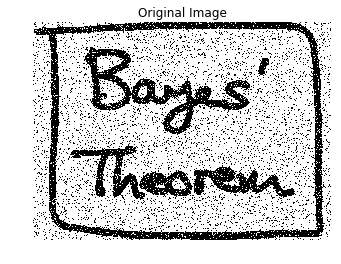

In [2]:
original_img = misc.imread('Bayes_noisy.png', mode='L')
img_bw = np.zeros(original_img.shape)
img_bw[original_img > 128] = 1
plt.imshow(img_bw)
plt.set_cmap('gray')
plt.title('Original Image')
a = plt.axis("off")

In [3]:
y = img_bw
x = y # Initialisation of x

x[x==0] = -1
y[y==0] = -1

# Set parameters
h_ = 0
beta_ = 1
eta_ = 2.1

def local_energy(i, j, x, y, h, beta, eta):
    energy = h * x[i, j]
    s = 0
    for k in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
        if k[0] >= 0 and k[0] <= 459 and k[1] >= 0 and k[1] <= 629:
            s += x[k]
    energy -= eta * x[i, j] * s
    energy -= beta * x[i, j] * y[i, j]
    return energy

In [4]:
for k in range(2):
    for i in range(460):
        for j in range(630):
            le1 = local_energy(i, j, x, y, h_, beta_, eta_)
            x[i, j] = -x[i, j]
            le2 = local_energy(i, j, x, y, h_, beta_, eta_)
            if le1 < le2:
                x[i, j] = -x[i, j]
    print('Done with epoch', k)

Done with epoch 0
Done with epoch 1


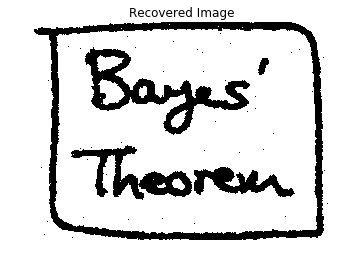

In [5]:
x[x==-1] = 0
plt.imshow(x)
plt.set_cmap('gray')
plt.title('Recovered Image')
a = plt.axis("off")

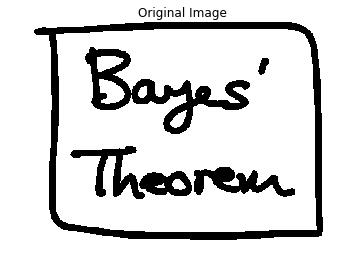

In [6]:
true_img = misc.imread('Bayes_true.png', mode='L')
true_img_bw = np.zeros(original_img.shape)
true_img_bw[true_img > 128] = 1
plt.imshow(true_img_bw)
plt.set_cmap('gray')
plt.title('Original Image')
a = plt.axis("off")

In [7]:
numCorrect = 0;

for i in range(460):
    for j in range(630):
        if(x[i,j] == true_img_bw[i,j]):
            numCorrect = numCorrect + 1;

accuracy = numCorrect/(630*460);

print(accuracy)

0.975728088336784
